# Verifying that lateral GABA inhibtion affects firing rate in a population

In [1]:
%matplotlib inline

import os
import numpy as np
network_path = os.path.join("..", "networks", "sten_1")
network_file = os.path.join(network_path, "network-synapses-minimal.hdf5")
simulation_file_with_synapses = os.path.join(network_path, "simulation", "output-with-synapses-sten_1-A.hdf5")
simulation_file_no_synapses = os.path.join(network_path, "simulation", "output-no-synapses-sten_1-A.hdf5")
duration = 18

# Plot network

Reading SNUDDA_DATA=../../../../../../BasalGangliaData/data/ from ../networks/sten_1/network-config.json
Population unit 0 has 32000 neurons
Population unit 1 has 4000 neurons
Population unit 2 has 4000 neurons
Population unit 0 has 32000 neurons
Population unit 1 has 4000 neurons
Population unit 2 has 4000 neurons


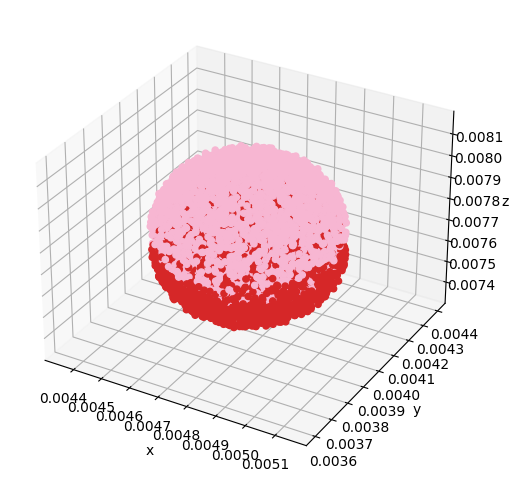

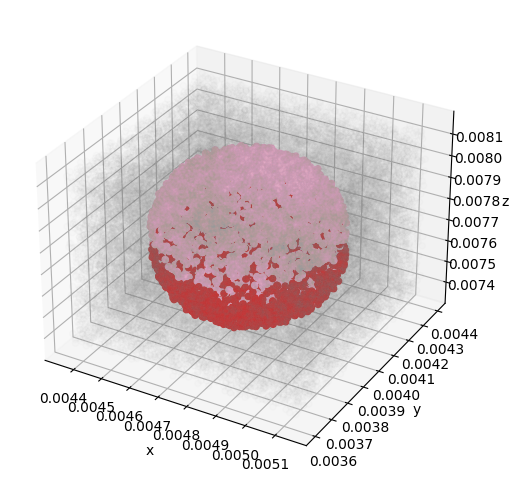

In [2]:
from snudda.plotting import PlotNetwork

pn = PlotNetwork(network_path)
pn.plot_populations(unmarked_alpha=0)
pn.plot_populations(unmarked_alpha=0.02)

# The commented code below also plots the network, but with the option to plot more detail of the neurons:
# pn = PlotNetwork(network_path)
# pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False, colour_population_unit=True)

pn.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)

Reading SNUDDA_DATA=../../../../../../BasalGangliaData/data/ from ../networks/sten_1/network-config.json
Population unit 1 has 4000 neurons
Population unit 2 has 4000 neurons
Population unit 1 has 4000 neurons
Population unit 2 has 4000 neurons


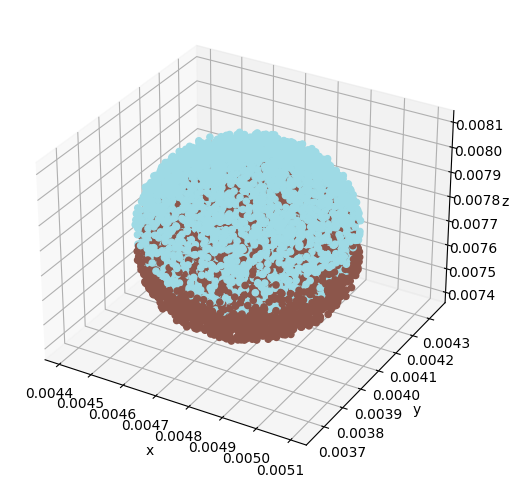

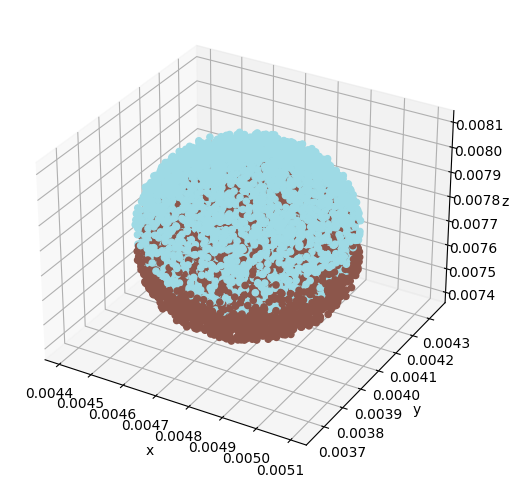

In [3]:
from snudda.plotting import PlotNetwork

pn2 = PlotNetwork(network_file)
pn2.plot_populations(unmarked_alpha=0)
pn2.plot_populations(unmarked_alpha=0.02)

# The commented code below also plots the network, but with the option to plot more detail of the neurons:
# pn = PlotNetwork(network_path)
# pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False, colour_population_unit=True)

pn2.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)

# Plot neuron input

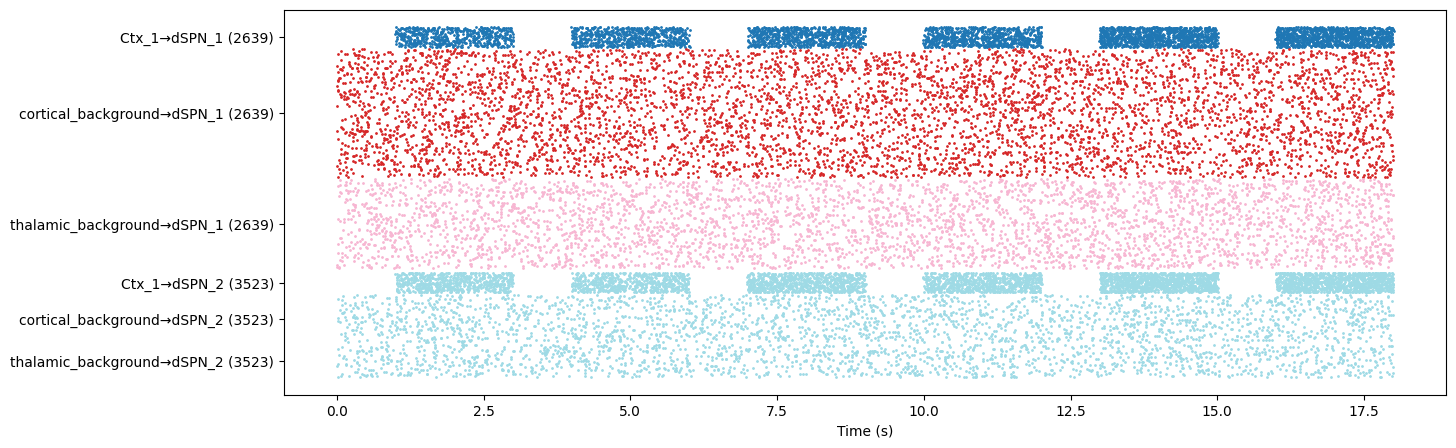

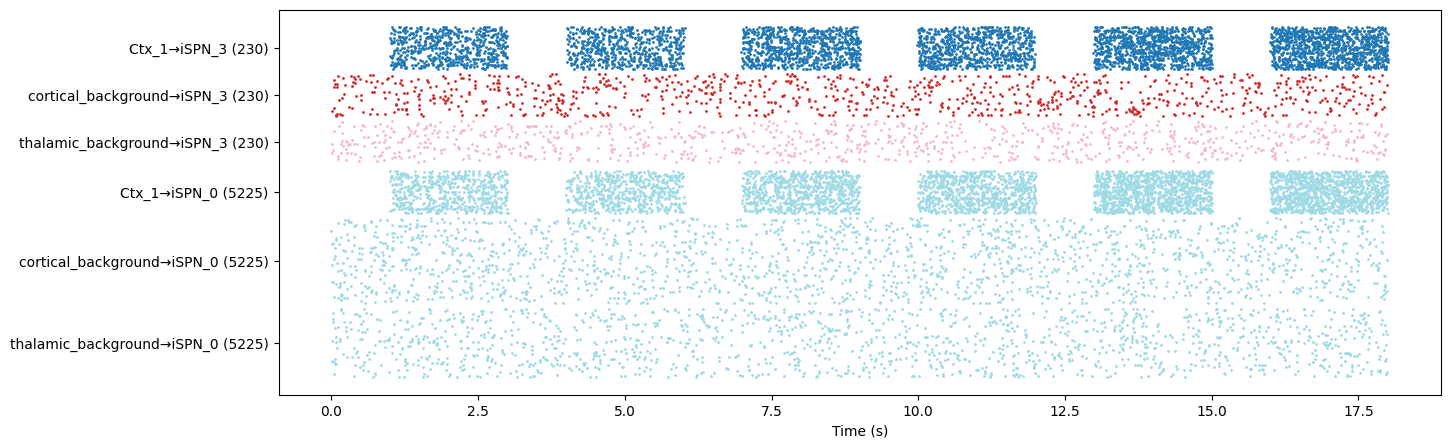

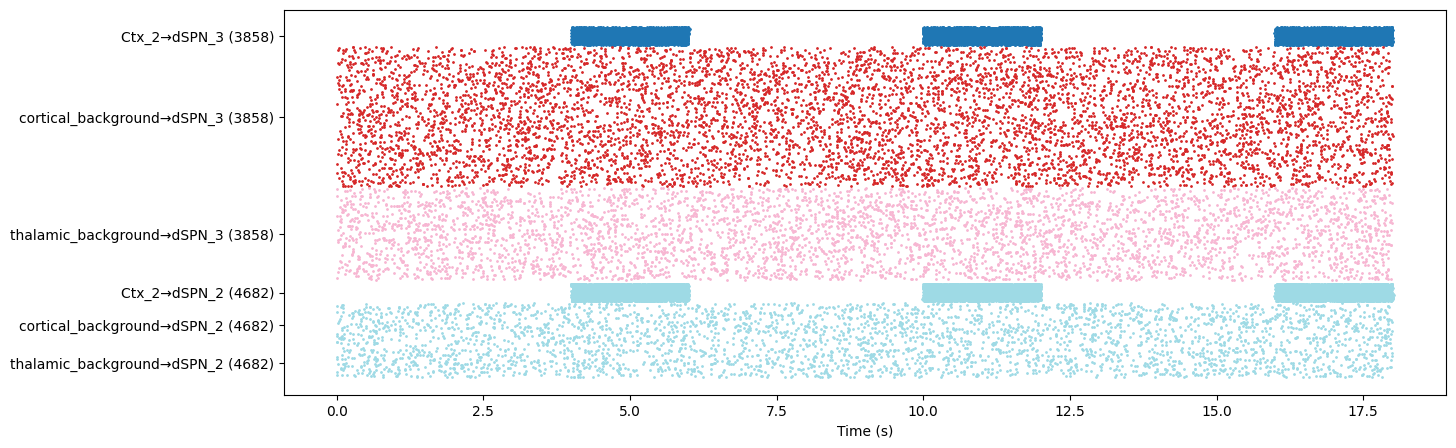

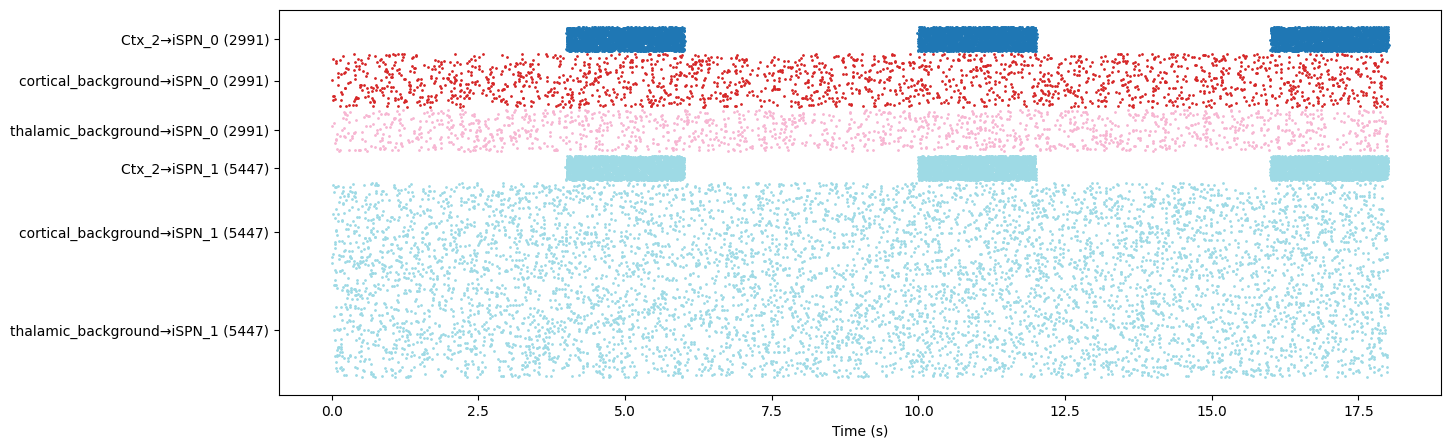

In [4]:
from snudda.plotting import PlotInput
input_file = os.path.join(network_path, "input-spikes.hdf5")
spi = PlotInput(input_file, network_file)
spi.plot_input_population_unit(population_unit_id=1, num_neurons=2, neuron_type="dSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=1, num_neurons=2, neuron_type="iSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=2, num_neurons=2, neuron_type="dSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=2, num_neurons=2, neuron_type="iSPN", fig_size=(15,5))

In [5]:
# Cleanup
pn = None
spi = None

# Plot neuron activity

## With lateral inhibtion

In [6]:
from snudda.plotting import SnuddaPlotSpikeRaster2
fig_file_raster = f"spike-raster.png"

time_range_zoom = (0,duration)
spr = SnuddaPlotSpikeRaster2(network_path=network_path, network_file=network_file, simulation_file=simulation_file_with_synapses)# 

# spr.plot_spike_raster(fig_file=fig_file_raster, time_range=time_range_zoom)

Loading ../networks/sten_1/simulation/output-with-synapses-sten_1-A.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
21: (dSPN_0, pe1ec8fbd, mbb8e5b24)
84: (dSPN_2, p185b99a1, mdf60297d)
254: (dSPN_0, p8bf90d1f, mf702205f)
272: (dSPN_0, pe6ec2d4b, mf702205f)
336: (dSPN_2, p185b99a1, mdf60297d)
682: (dSPN_0, p7aa400d6, m9fda9b20)
687: (dSPN_0, p8bf90d1f, mf702205f)
1282: (dSPN_0, pe1ec8fbd, m22be6817)
1317: (dSPN_1, p81757e87, m71f9efc2)
1414: (iSPN_0, p635b801c, m7bc82287)
1430: (iSPN_0, p581376d6, md0f5647c)
1593: (dSPN_0, p1863c9a5, m22be6817)
1701: (iSPN_0, p581376d6, m3a845add)
1721: (iSPN_0, p581376d6, mc16840cd)
1742: (iSPN_0, p581376d6, mc16840cd)
1901: (dSPN_0, pe1ec8fbd, m22be6817)
1902: (dSPN_0, p8bf90d1f, mf702205f)
2124: (iSPN_3, p57956f10, m541041a7)
2134: (iSPN_3, p57956f10, m1083058d)
2161: (dSPN_0, p510bab86, mf702205f)
2176: (dSPN_0, pb0529fb9, mbb8e5b24)
2181: (dSPN_0, p510bab86, mf702205f)
2210: (dSPN_1, p4e92e4bc, m828

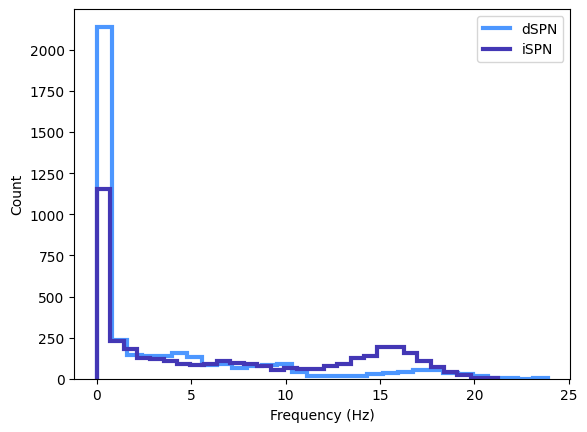

In [7]:
spr.plot_firing_frequency_distribution(bins=30)

Saving figure ../networks/sten_1/figures/spike-frequency-pop-units1-2.pdf


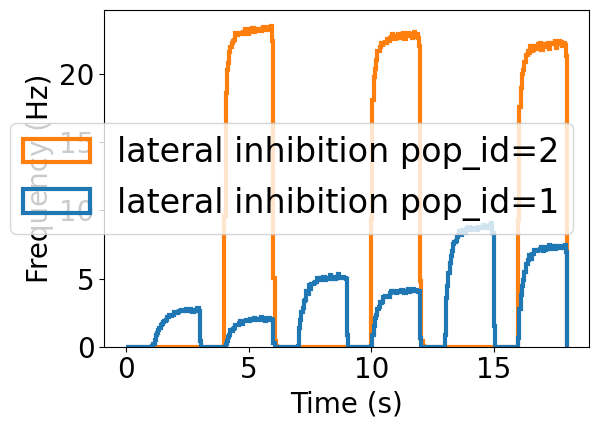

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [8]:
spr.plot_spike_histogram(label_text="lateral inhibition pop_id=")

## Without lateral inhibition

In [9]:
from snudda.plotting import SnuddaPlotSpikeRaster2
fig_file_raster = f"spike-raster.png"

time_range_zoom = (0,duration)
spr_no = SnuddaPlotSpikeRaster2(network_path=network_path, network_file=network_file, simulation_file=simulation_file_no_synapses)

# spr_no.plot_spike_raster(fig_file=fig_file_raster, time_range=time_range_zoom)

Loading ../networks/sten_1/simulation/output-no-synapses-sten_1-A.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
5: (iSPN_0, p581376d6, m6486ed26)
204: (dSPN_0, pb0529fb9, mf702205f)
211: (dSPN_1, p81757e87, mad2e6da1)
248: (dSPN_0, p7aa400d6, m9fda9b20)
262: (dSPN_0, p7517a0e9, m37886c78)
264: (dSPN_0, p1863c9a5, m9fda9b20)
278: (dSPN_0, p7517a0e9, m37886c78)
300: (dSPN_1, p81757e87, mad2e6da1)
680: (dSPN_0, p7aa400d6, mc710c1a4)
685: (dSPN_0, pb0529fb9, m22be6817)
692: (dSPN_0, p8bf90d1f, mf702205f)
695: (dSPN_0, pb0529fb9, m9fda9b20)
710: (dSPN_1, p81757e87, mc44c4566)
724: (dSPN_1, p81757e87, mc44c4566)
745: (dSPN_2, p185b99a1, mdf60297d)
898: (iSPN_0, p635b801c, m3a845add)
987: (dSPN_2, p185b99a1, mdf60297d)
1199: (iSPN_0, p581376d6, m6486ed26)
1255: (iSPN_3, p57956f10, m1083058d)
1278: (dSPN_0, p7aa400d6, mf702205f)
1294: (dSPN_0, p1863c9a5, m37886c78)
1305: (dSPN_1, p81757e87, mc44c4566)
1317: (dSPN_1, p81757e87, m71f9efc2)
1319:

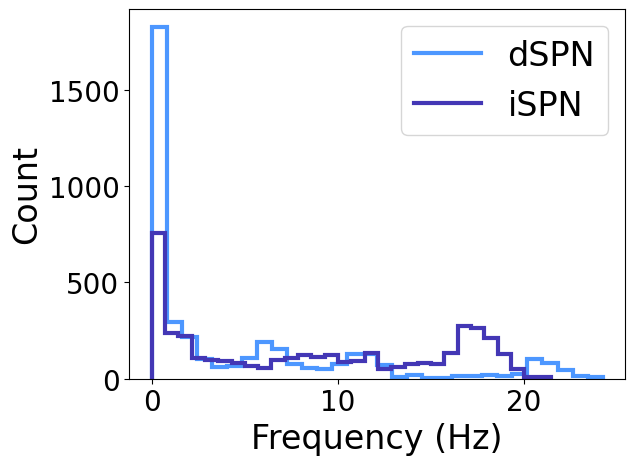

In [10]:
spr_no.plot_firing_frequency_distribution(bins=30)

Saving figure ../networks/sten_1/figures/spike-frequency-pop-units1-2.pdf


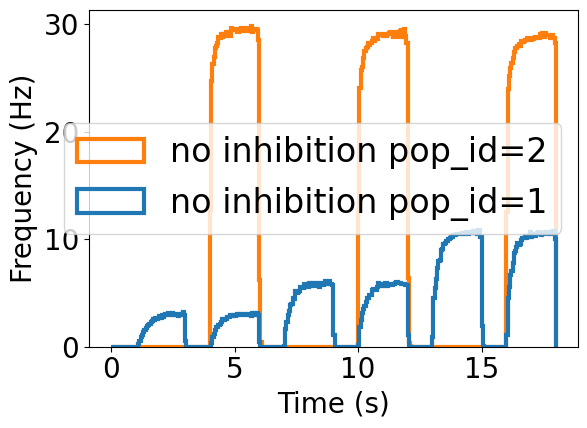

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [11]:
spr_no.plot_spike_histogram(label_text="no inhibition pop_id=")

# Summarising difference in activity (with and without lateral inhibition)

Saving figure ../networks/sten_1/figures/spike-frequency-pop-units1-2.pdf


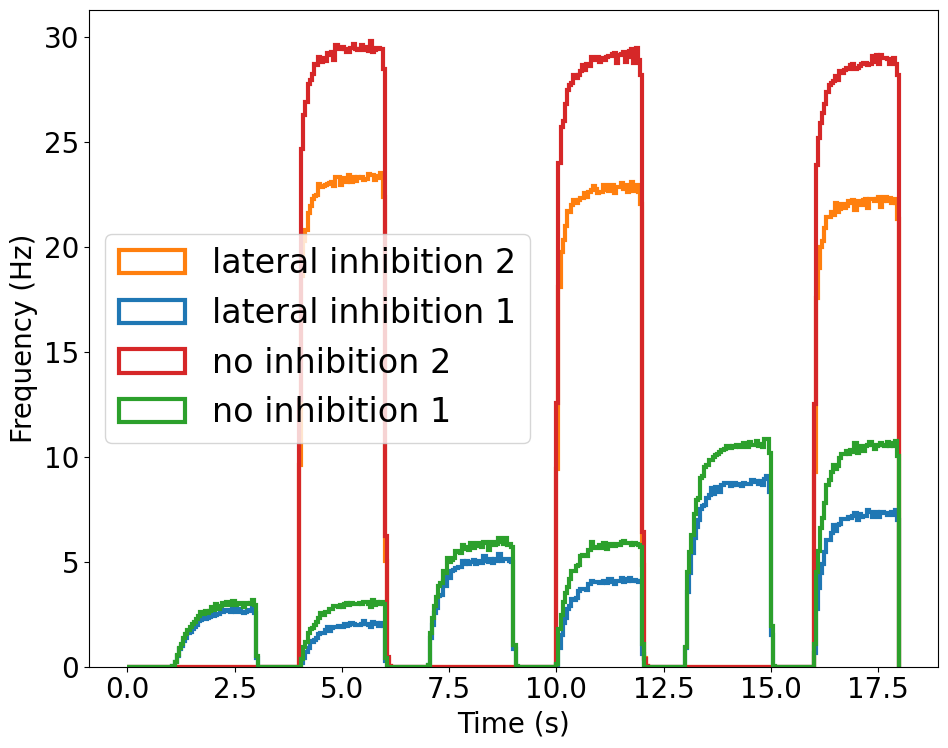

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [12]:
ax = spr.plot_spike_histogram(label_text="lateral inhibition ", show_figure=False, save_figure=False, fig_size=(10,8))
spr_no.plot_spike_histogram(ax=ax, label_text="no inhibition ", show_figure=True, save_figure=True)

In [13]:
# Cleanup
spr = None
spr_no = None

# Plotting the traces for the two cases to make sure it looks ok

In [14]:
from snudda.plotting.plot_traces import PlotTraces
pt_with_syn = PlotTraces(output_file=simulation_file_with_synapses, network_file=network_file)
# Use trace_id to specify which traces


Loading network info from ../networks/sten_1/network-synapses-minimal.hdf5
Loading input info from ../networks/sten_1/input-spikes.hdf5
Loading ../networks/sten_1/simulation/output-with-synapses-sten_1-A.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
21: (dSPN_0, pe1ec8fbd, mbb8e5b24)
84: (dSPN_2, p185b99a1, mdf60297d)
254: (dSPN_0, p8bf90d1f, mf702205f)
272: (dSPN_0, pe6ec2d4b, mf702205f)
336: (dSPN_2, p185b99a1, mdf60297d)
682: (dSPN_0, p7aa400d6, m9fda9b20)
687: (dSPN_0, p8bf90d1f, mf702205f)
1282: (dSPN_0, pe1ec8fbd, m22be6817)
1317: (dSPN_1, p81757e87, m71f9efc2)
1414: (iSPN_0, p635b801c, m7bc82287)
1430: (iSPN_0, p581376d6, md0f5647c)
1593: (dSPN_0, p1863c9a5, m22be6817)
1701: (iSPN_0, p581376d6, m3a845add)
1721: (iSPN_0, p581376d6, mc16840cd)
1742: (iSPN_0, p581376d6, mc16840cd)
1901: (dSPN_0, pe1ec8fbd, m22be6817)
1902: (dSPN_0, p8bf90d1f, mf702205f)
2124: (iSPN_3, p57956f10, m541041a7)
2134: (iSPN_3, p57956f10, m1083058d)
2161:

In [15]:
pop_id_1 = pt_with_syn.network_info.get_population_unit_members(population_unit=1, num_neurons=30)
pop_id_2 = pt_with_syn.network_info.get_population_unit_members(population_unit=2, num_neurons=30)

Plotting traces: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23 24
 25 26 28 29 30 31]
Plotted 30 traces (total 8000)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_1/figures/Network-voltage-trace--dSPN-iSPN.pdf


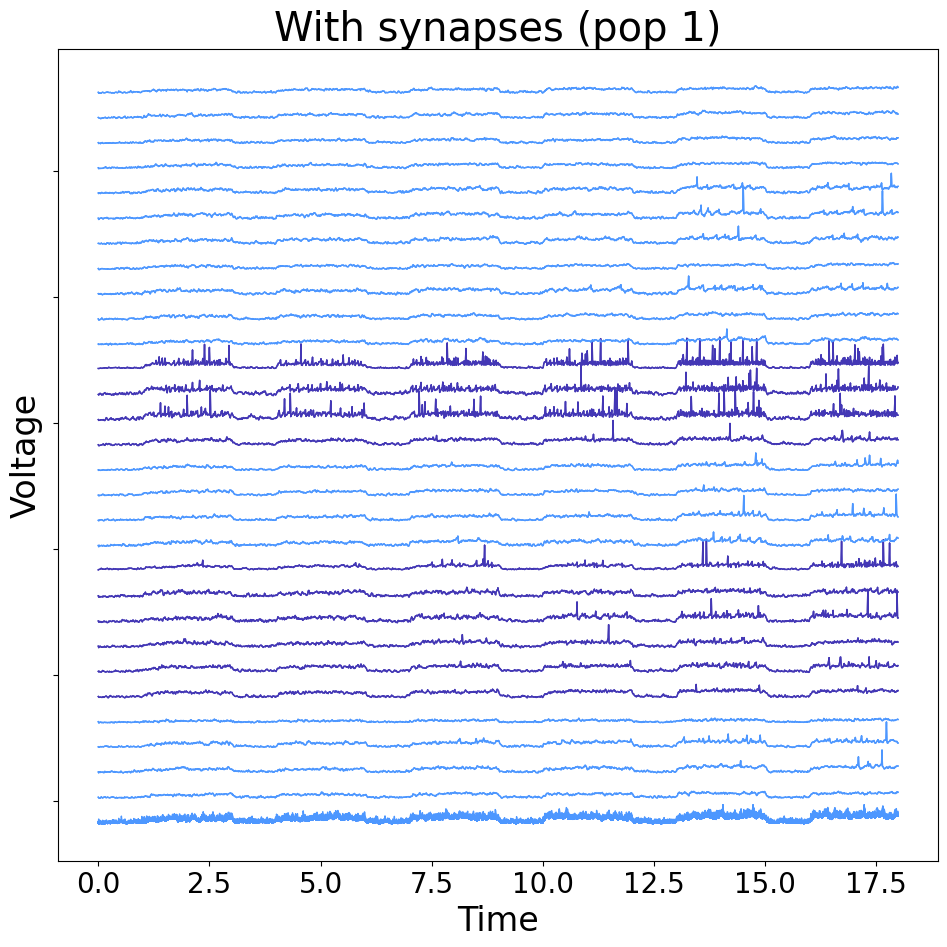

In [16]:
ax = pt_with_syn.plot_traces(offset=0.1, time_range=(0,duration),fig_size=(10,10), title="With synapses (pop 1)",
                            trace_id=pop_id_1)

Plotting traces: [ 21  27  48  54  66  71  82  83  94 105 111 123 125 143 154 158 162 163
 164 167 168 169 180 199 203 204 208 209 210 211]
Plotted 30 traces (total 8000)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_1/figures/Network-voltage-trace--dSPN-iSPN.pdf


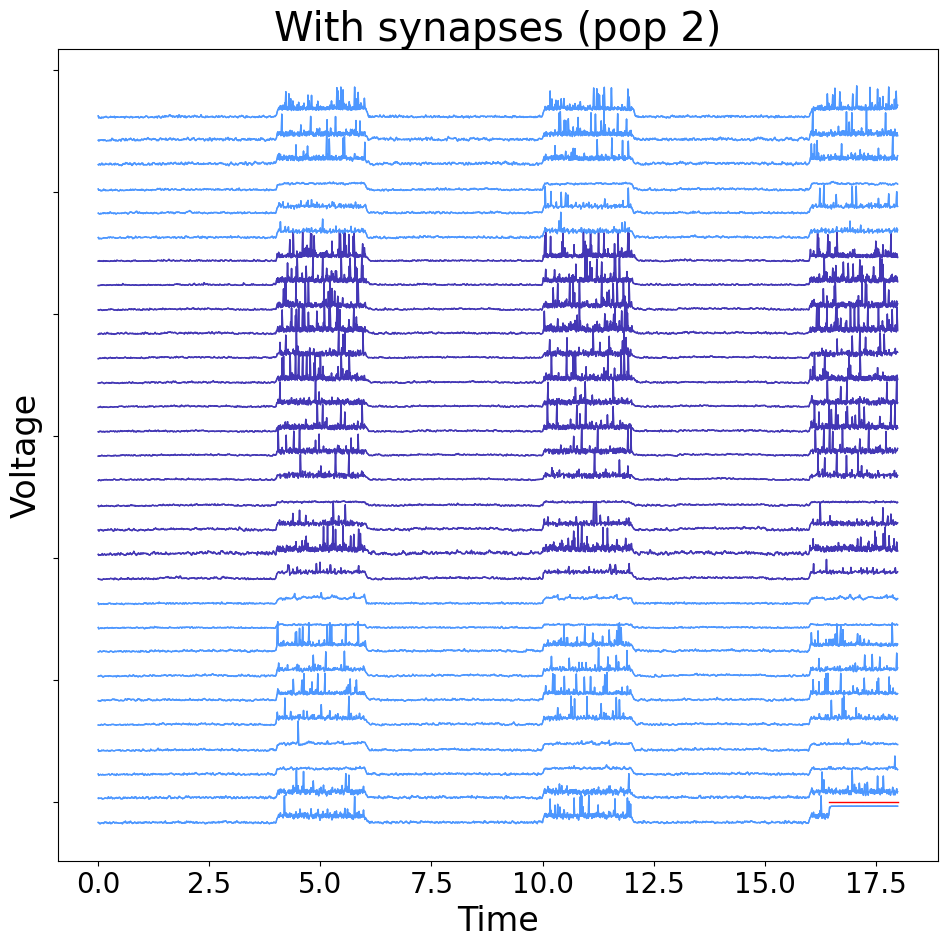

In [17]:
ax = pt_with_syn.plot_traces(offset=0.1, time_range=(0,duration),fig_size=(10,10), title="With synapses (pop 2)",
                            trace_id=pop_id_2)

In [18]:
from snudda.plotting.plot_traces import PlotTraces
pt_no_syn = PlotTraces(output_file=simulation_file_no_synapses, network_file=network_file)
# Use trace_id to specify which traces

Loading network info from ../networks/sten_1/network-synapses-minimal.hdf5
Loading input info from ../networks/sten_1/input-spikes.hdf5
Loading ../networks/sten_1/simulation/output-no-synapses-sten_1-A.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
5: (iSPN_0, p581376d6, m6486ed26)
204: (dSPN_0, pb0529fb9, mf702205f)
211: (dSPN_1, p81757e87, mad2e6da1)
248: (dSPN_0, p7aa400d6, m9fda9b20)
262: (dSPN_0, p7517a0e9, m37886c78)
264: (dSPN_0, p1863c9a5, m9fda9b20)
278: (dSPN_0, p7517a0e9, m37886c78)
300: (dSPN_1, p81757e87, mad2e6da1)
680: (dSPN_0, p7aa400d6, mc710c1a4)
685: (dSPN_0, pb0529fb9, m22be6817)
692: (dSPN_0, p8bf90d1f, mf702205f)
695: (dSPN_0, pb0529fb9, m9fda9b20)
710: (dSPN_1, p81757e87, mc44c4566)
724: (dSPN_1, p81757e87, mc44c4566)
745: (dSPN_2, p185b99a1, mdf60297d)
898: (iSPN_0, p635b801c, m3a845add)
987: (dSPN_2, p185b99a1, mdf60297d)
1199: (iSPN_0, p581376d6, m6486ed26)
1255: (iSPN_3, p57956f10, m1083058d)
1278: (dSPN_0, p7

In [19]:
pop_id_1 = pt_no_syn.network_info.get_population_unit_members(population_unit=1, num_neurons=30)
pop_id_2 = pt_no_syn.network_info.get_population_unit_members(population_unit=2, num_neurons=30)

Plotting traces: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23 24
 25 26 28 29 30 31]
Plotted 30 traces (total 8000)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_1/figures/Network-voltage-trace--dSPN-iSPN.pdf


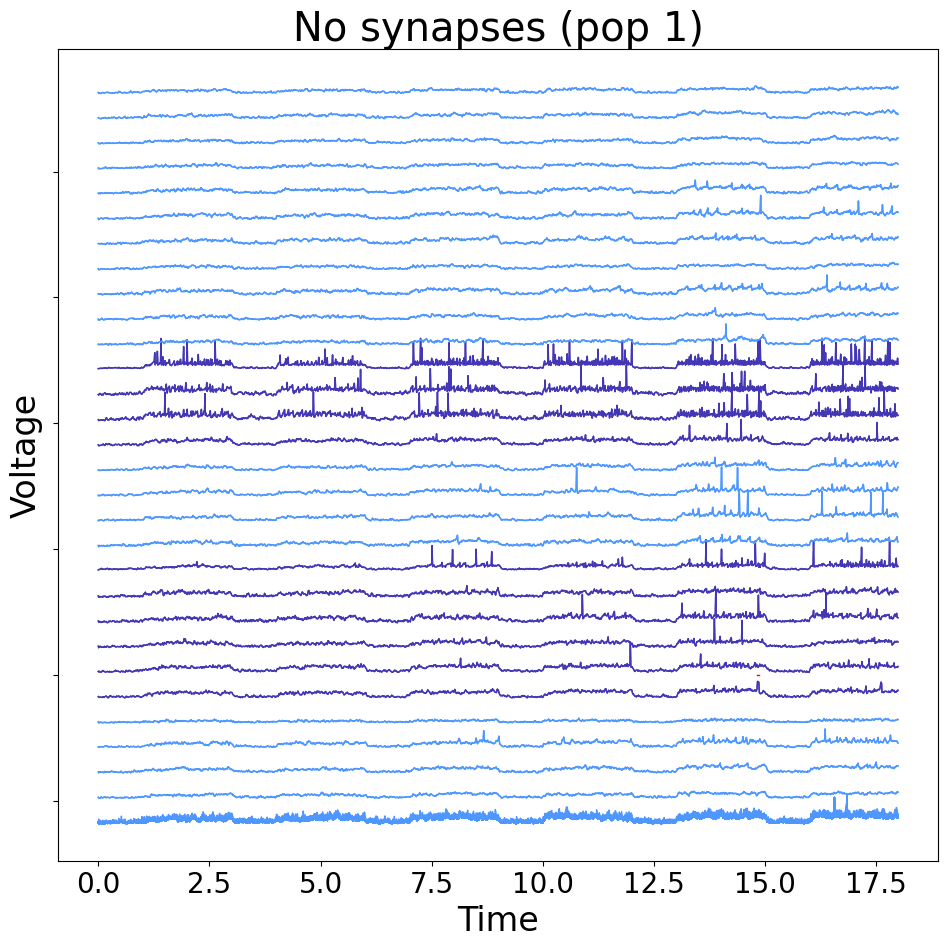

In [20]:
ax = pt_no_syn.plot_traces(offset=0.1, time_range=(0,duration),fig_size=(10,10), title="No synapses (pop 1)",
                           trace_id=pop_id_1)

Plotting traces: [ 21  27  48  54  66  71  82  83  94 105 111 123 125 143 154 158 162 163
 164 167 168 169 180 199 203 204 208 209 210 211]
Plotted 30 traces (total 8000)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_1/figures/Network-voltage-trace--dSPN-iSPN.pdf


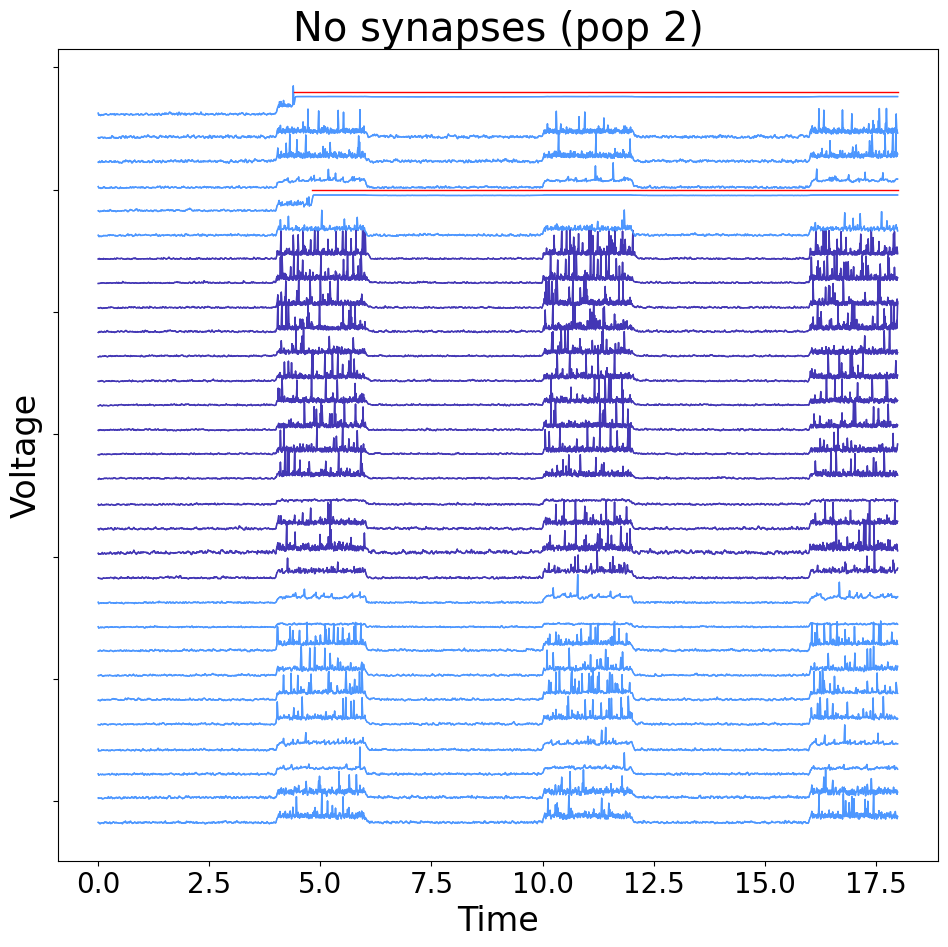

In [21]:
ax = pt_no_syn.plot_traces(offset=0.1, time_range=(0,duration),fig_size=(10,10), title="No synapses (pop 2)",
                           trace_id=pop_id_2)

# Plot neuron with depolarisation block

In [22]:
bad_idx_with_syn = np.unique([x[0] for x in pt_with_syn.output_load.depolarisation_block])
bad_idx_no_syn = np.unique([x[0] for x in pt_no_syn.output_load.depolarisation_block])

# Should be same network (with syn and without syn)
pop_id_1 = pt_with_syn.network_info.get_population_unit_members(population_unit=1)
pop_id_2 = pt_with_syn.network_info.get_population_unit_members(population_unit=2)

bad_idx_with_syn_1 = np.intersect1d(bad_idx_with_syn, pop_id_1)
bad_idx_with_syn_2 = np.intersect1d(bad_idx_with_syn, pop_id_2)

bad_idx_no_syn_1 = np.intersect1d(bad_idx_no_syn, pop_id_1)
bad_idx_no_syn_2 = np.intersect1d(bad_idx_no_syn, pop_id_2)

Plotting traces: [  84  336 2134 3192 3524 4390 4938 5521 5836 6014 7022 7554]
Plotted 12 traces (total 8000)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_1/figures/Network-voltage-trace--dSPN-iSPN.pdf


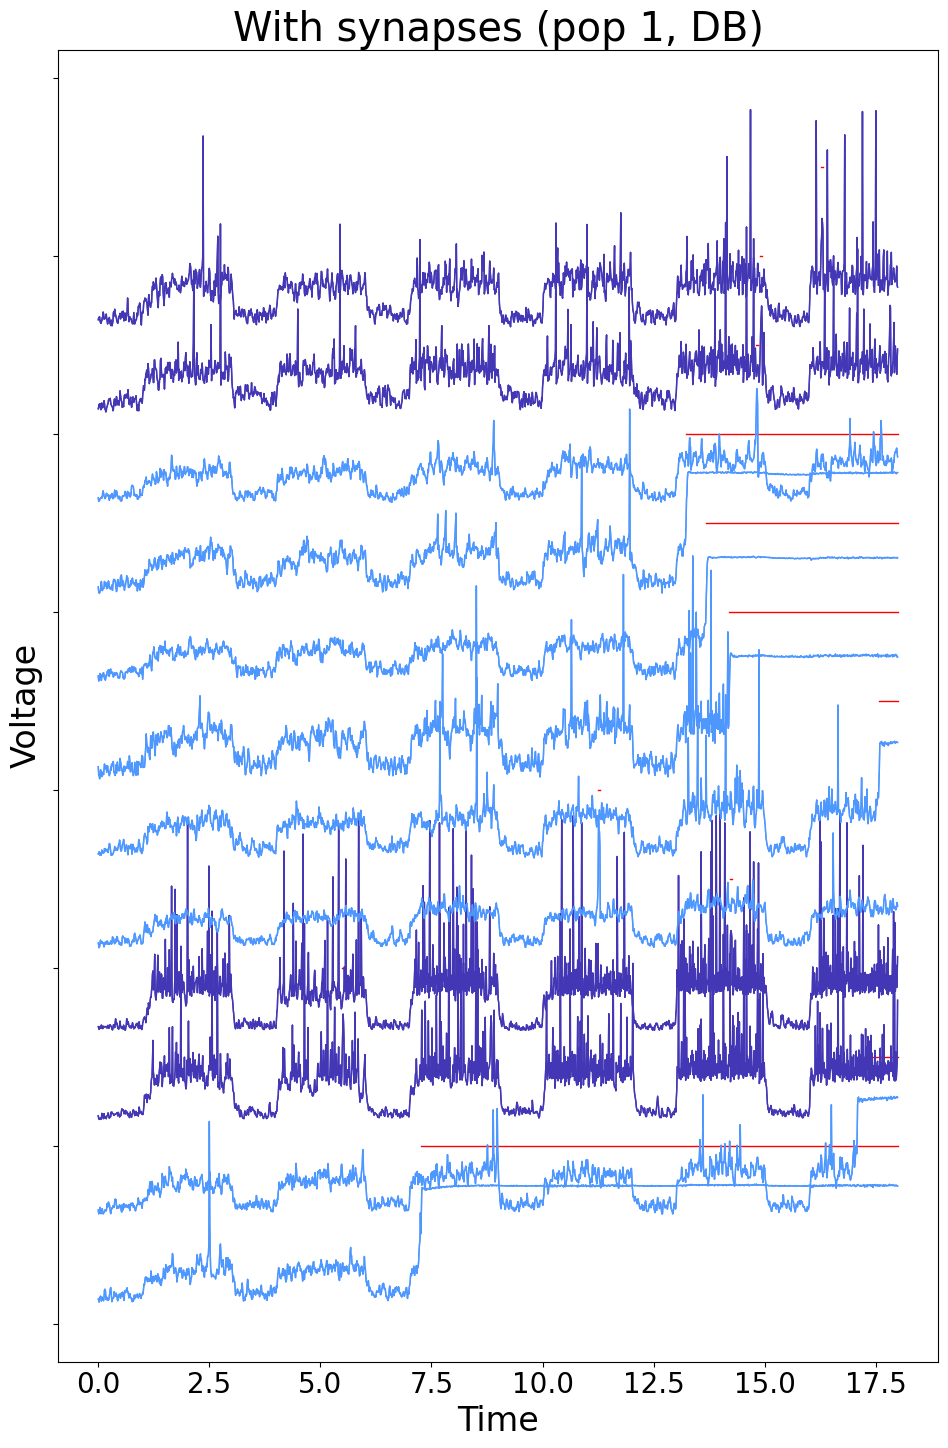

In [23]:
ax = pt_with_syn.plot_traces(offset=0.05, time_range=(0,duration),fig_size=(10,15), title="With synapses (pop 1, DB)",
                            trace_id=bad_idx_with_syn_1)

Plotting traces: [  21  254  272  682  687 1282 1317 1414 1430 1593 1701 1721 1742 1901
 1902 2124 2161 2176 2181 2210 2242 2293 2299 2442 2451 2452 2455 2462
 2463 2552 2553 2570 2573 2574 2642 2645 2648 2653 2754 2765 2941 2974
 3012 3017 3030 3198 3199 3442 3443 3496 3509 3552 3743 3744 3760 4029
 4038 4059 4190 4315 4351 4453 4614 4622 4636 4645 4650 4672 4750 4910
 4920 5124 5139 5215 5222 5223 5224 5532 5534 5538 5542 5583 5677 5837
 5882 5909 5929 5975 5977 6024 6054 6167 6260 6374 6397 6398 6400 6415
 6527 6531 6635 6637 6644 6646 6718 6720 6794 6820 6890 6951 7081 7122
 7128 7160 7162 7173 7232 7235 7241 7247 7378 7383 7477 7587 7597 7598
 7617 7688 7725 7726 7727 7730 7743 7749 7750 7754 7763 7785 7853 7889
 7906 7981 7984]
Plotted 143 traces (total 8000)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_1/figures/Network-voltage-trace--dSPN-iSPN.pdf


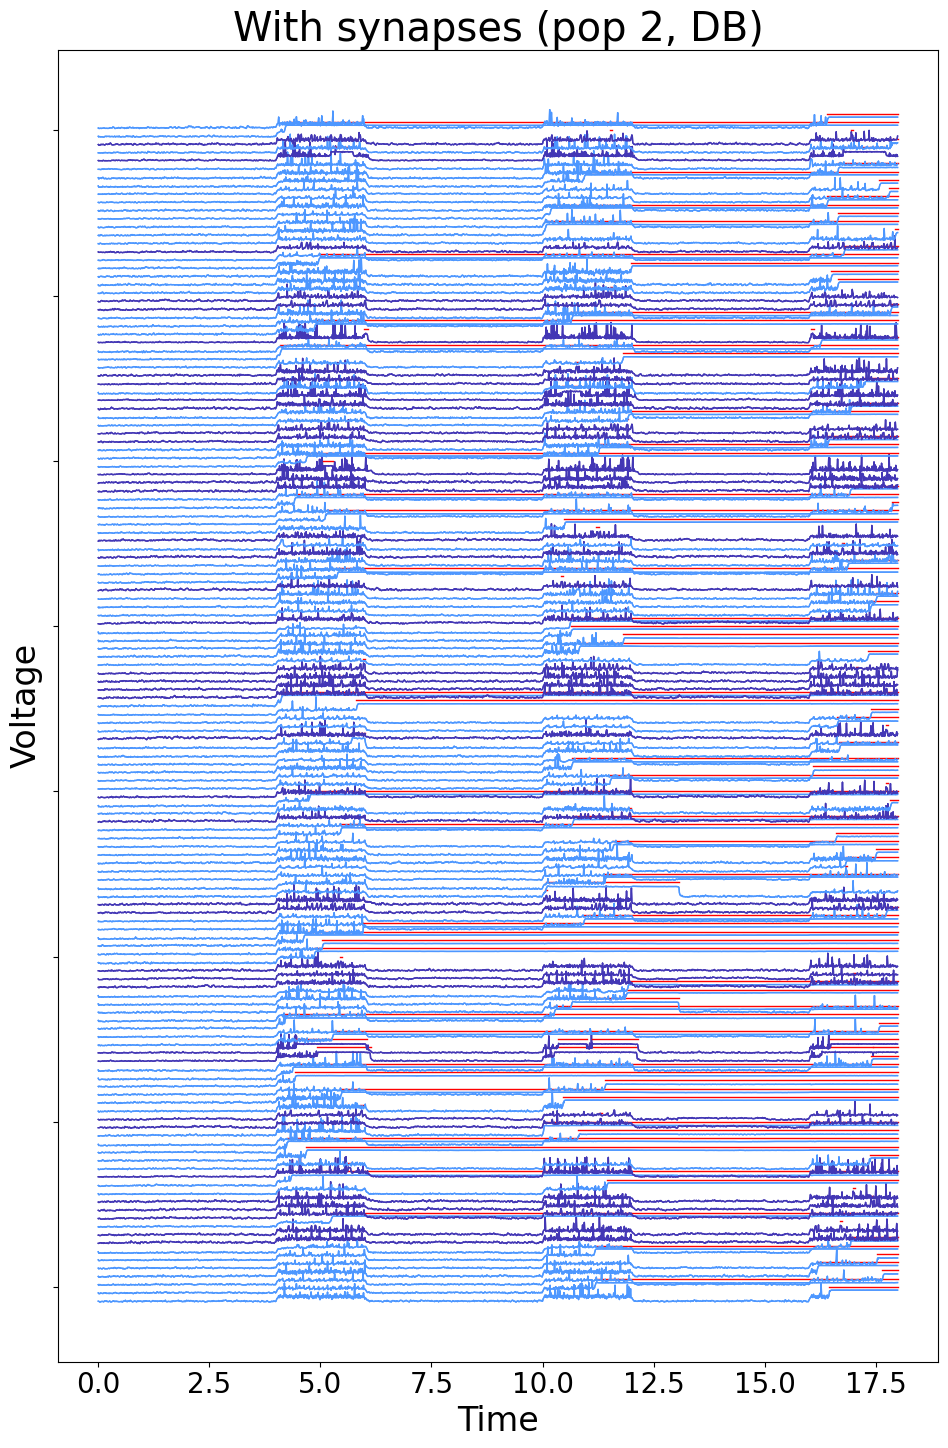

In [24]:
ax = pt_with_syn.plot_traces(offset=0.05, time_range=(0,duration),fig_size=(10,15), title="With synapses (pop 2, DB)",
                            trace_id=bad_idx_with_syn_2)

Plotting traces: [   5  987 1255 1294 1735 2038 2134 2600 2993 3154 3263 3427 4279 4300
 4589 5429 5492 5518 5696 5876 7004 7009]
Plotted 22 traces (total 8000)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_1/figures/Network-voltage-trace--dSPN-iSPN.pdf


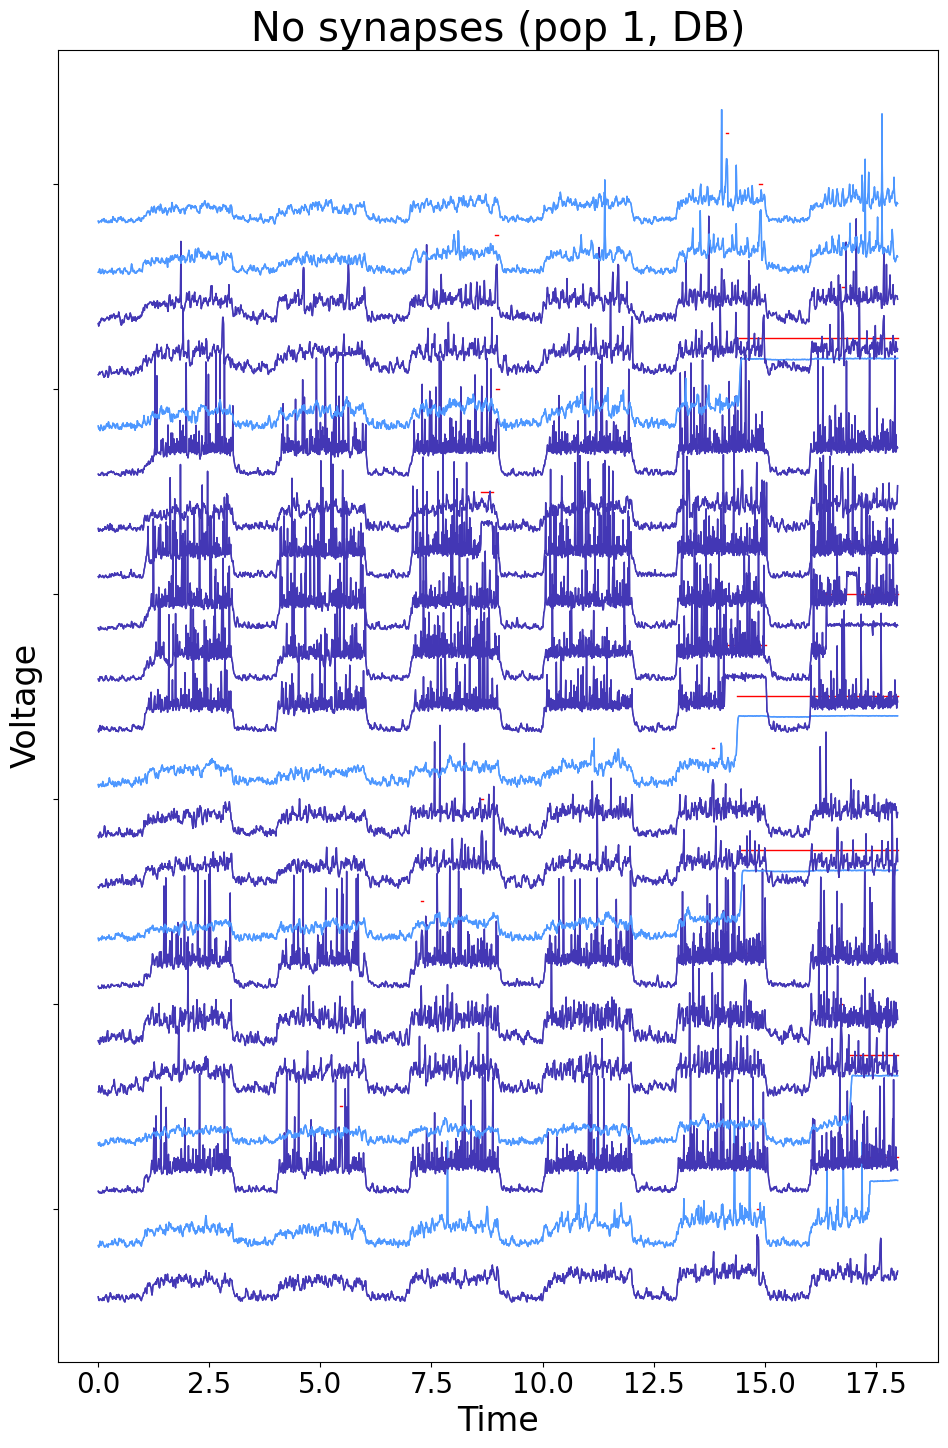

In [25]:
ax = pt_no_syn.plot_traces(offset=0.05, time_range=(0,duration),fig_size=(10,15), title="No synapses (pop 1, DB)",
                           trace_id=bad_idx_no_syn_1)

Plotting traces: [ 204  211  248  262  264  278  300  680  685  692  695  710  724  745
  898 1199 1278 1305 1317 1319 1566 1570 1581 1711 1882 1886 1887 1892
 1903 2026 2114 2124 2168 2224 2234 2451 2452 2456 2462 2465 2474 2552
 2553 2565 2573 2589 2626 2648 2653 2913 2916 2921 2967 2969 2991 3012
 3015 3018 3019 3030 3198 3200 3214 3430 3461 3464 3465 3480 3482 3493
 3547 3596 3613 3742 3743 3744 3749 3753 3754 3756 3758 3765 3785 3788
 3796 3798 3887 4029 4030 4036 4045 4046 4050 4051 4059 4062 4068 4093
 4098 4115 4307 4325 4326 4329 4336 4344 4359 4363 4371 4592 4602 4605
 4607 4612 4640 4656 4660 4910 4918 4951 5088 5126 5128 5137 5158 5174
 5234 5244 5310 5382 5496 5519 5520 5526 5527 5531 5536 5538 5539 5541
 5575 5583 5848 5882 5886 5895 5977 6117 6123 6128 6139 6141 6152 6180
 6194 6248 6249 6262 6376 6397 6410 6411 6415 6429 6463 6517 6639 6643
 6651 6653 6667 6677 6786 6790 6800 6804 6806 6951 6963 6995 7074 7081
 7086 7091 7132 7159 7232 7234 7244 7249 7263 7266 7281 7299

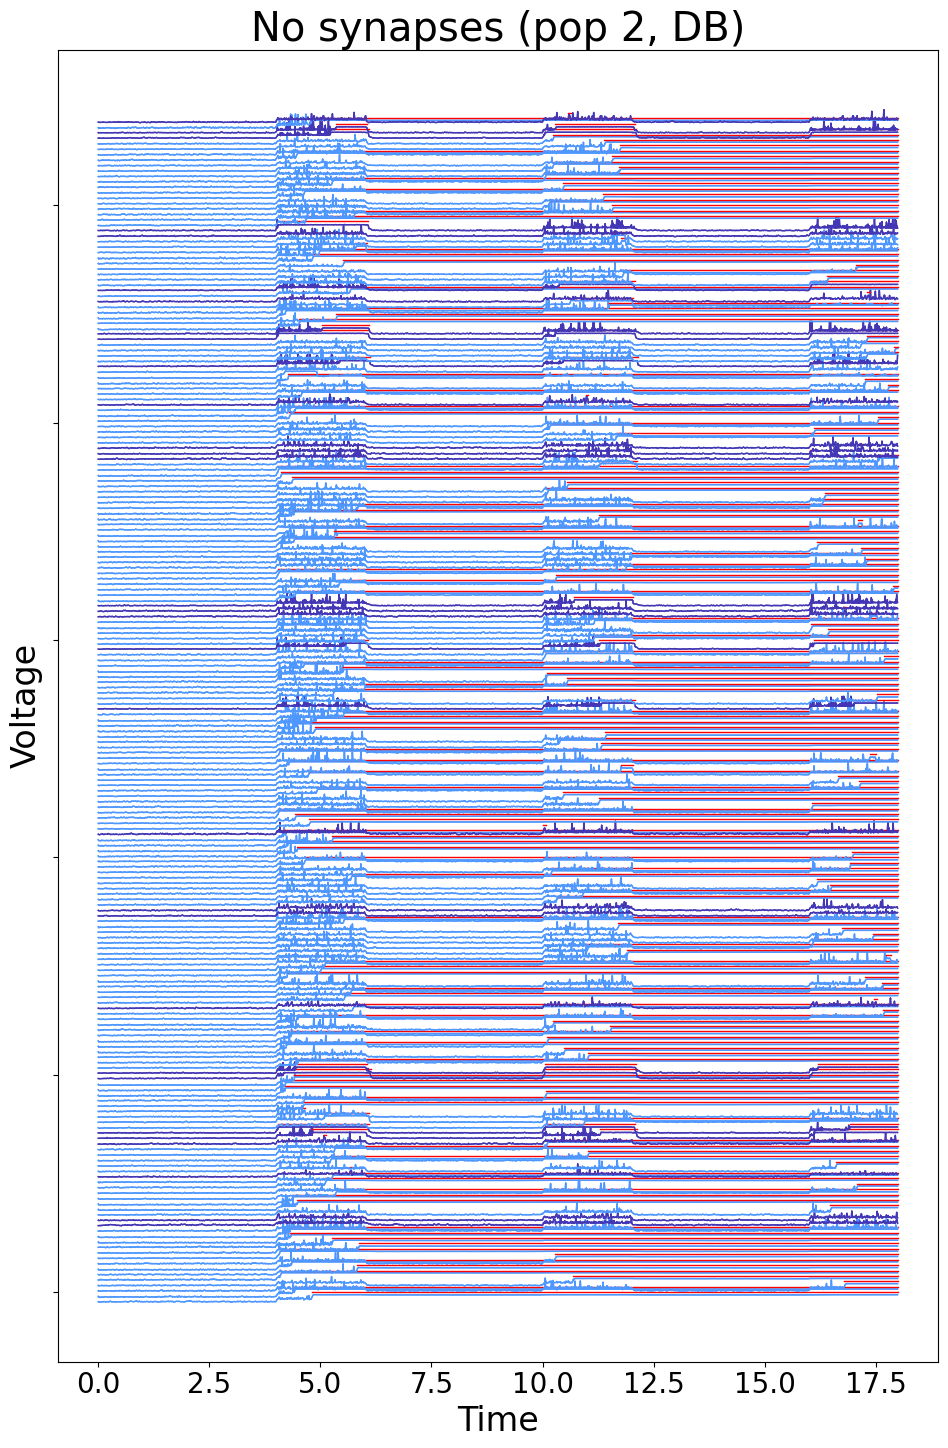

In [26]:
ax = pt_no_syn.plot_traces(offset=0.05, time_range=(0,duration),fig_size=(10,15), title="No synapses (pop 2, DB)",
                           trace_id=bad_idx_no_syn_2)